CS4001/4042 Assignment 1
---
Part B, Q1 (15 marks)
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [4]:
pip install pytorch_tabular\[extra\]


Note: you may need to restart the kernel to use updated packages.


In [17]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

import torch
import torch.nn as nn

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

> Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from year 2020 and before as training data, and year 2021 as test data (validation set is not required).
**Do not** use data from year 2022 and year 2023.



In [4]:
df = pd.read_csv('hdb_price_prediction.csv')

# TODO: Enter your code here
df = df[df['year'] <= 2021].copy()

train_df = df[df['year'] <= 2020].copy()
test_df = df[df['year'] == 2021].copy()

train_df.drop(columns=['year','full_address','nearest_stn'], inplace=True)
test_df.drop(columns=['year','full_address','nearest_stn'], inplace=True)

print('Train set size:', len(train_df))
print('Test set size:', len(test_df))

Train set size: 87370
Test set size: 29057


> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [6]:
!pip install torch_optimizer

In [7]:
# TODO: Enter your code here

from torch_optimizer import QHAdam

data_config = DataConfig(
    target=['resale_price'],
    continuous_cols=[
        'dist_to_nearest_stn',
        'dist_to_dhoby',
        'degree_centrality',
        'eigenvector_centrality',
        'remaining_lease_years',
        'floor_area_sqm'
    ],
    categorical_cols=[
        'month',
        'town',
        'flat_model_type',
        'storey_range'
    ]
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50,
)

model_config = CategoryEmbeddingModelConfig(
    task='regression',
    layers='50',
    activation='ReLU'
)

optimizer_config = OptimizerConfig()

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

tabular_model.fit(train_df, optimizer=QHAdam)


2025-03-14 10:56:25,308 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


2025-03-14 10:56:25,325 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-14 10:56:25,362 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

/opt/anaconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/opt/anaconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

2025-03-14 10:56:25,464 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-14 10:56:25,492 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-14 10:56:25,537 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/yawen/Downloads/sc4001/saved_models exists and is not empty.
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/opt/anaconda3/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.5754399373371567
Restoring states from the checkpoint path at /Users/yawen/Downloads/sc4001/.lr_find_e1320166-7f91-46ca-a809-04febf9a114f.ckpt
Restored all states from the checkpoint at /Users/yawen/Downloads/sc4001/.lr_find_e1320166-7f91-46ca-a809-04febf9a114f.ckpt


2025-03-14 10:56:28,905 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.5754399373371567. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-14 10:56:28,908 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  3.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.6 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.6 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-14 10:56:49,752 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-14 10:56:49,753 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL omegaconf.dictconfig.DictConfig was not an allowed global by default. Please use `torch.serialization.add_safe_globals([DictConfig])` or the `torch.serialization.safe_globals([DictConfig])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

In [15]:
# Evaluation and prediction
evaluation = tabular_model.evaluate(test_df)
predicted = tabular_model.predict(test_df)

Output()

/opt/anaconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/opt/anaconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       7674813440.0        │
│  test_mean_squared_error  │       7674813440.0        │
└───────────────────────────┴───────────────────────────┘

/opt/anaconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/opt/anaconda3/lib/python3.12/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

> Report the test RMSE error and the test R2 value that you obtained.



In [18]:
# TODO: Enter your code here
from sklearn.metrics import mean_squared_error, r2_score

y_true = test_df['resale_price']
y_pred = predicted['resale_price_prediction']

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f'Test RMSE: {rmse:.3f}')
print(f'Test R2: {r2:.3f}')

Test RMSE: 87606.017
Test R2: 0.710


> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. 



In [21]:
# TODO: Enter your code here

df['error'] = abs(y_true - y_pred)

sorted_df = df.sort_values(by='error', ascending=False)

top_25_errors = sorted_df.head(25)

print('Top 25 Test Sampels with the Largest Errors:')
top_25_errors

Top 25 Test Sampels with the Largest Errors:


,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,error
88081,8,2021,ANG MO KIO,310A ANG MO KIO AVENUE 1,Ang Mo Kio,0.860056,7.263401,0.016807,0.006243,"5 ROOM, Improved",90.166667,121.0,28 TO 30,1100000.0,398580.25000
92442,11,2021,BUKIT MERAH,127D KIM TIAN ROAD,Tiong Bahru,0.686789,2.664024,0.016807,0.047782,"5 ROOM, Improved",90.333333,113.0,16 TO 18,1165000.0,396505.06250
92443,11,2021,BUKIT MERAH,96A HENDERSON ROAD,Tiong Bahru,0.586629,2.932814,0.016807,0.047782,"5 ROOM, Improved",96.583333,113.0,40 TO 42,1256000.0,392089.43750
92226,9,2021,BUKIT MERAH,96A HENDERSON ROAD,Tiong Bahru,0.586629,2.932814,0.016807,0.047782,"5 ROOM, Improved",96.750000,113.0,28 TO 30,1220000.0,387354.18750
88822,3,2021,BEDOK,219B BEDOK CENTRAL,Bedok,0.403294,10.189193,0.016807,0.001156,"5 ROOM, Improved",88.166667,112.0,01 TO 03,862000.0,387018.59375
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,385981.93750
87728,4,2021,ANG MO KIO,310B ANG MO KIO AVENUE 1,Ang Mo Kio,0.840557,7.242274,0.016807,0.006243,"5 ROOM, Improved",90.416667,119.0,07 TO 09,950000.0,370618.68750
91908,6,2021,BUKIT MERAH,9B BOON TIONG ROAD,Tiong Bahru,0.221328,2.322012,0.016807,0.047782,"5 ROOM, Improved",93.666667,112.0,22 TO 24,1205500.0,366470.81250
92010,7,2021,BUKIT MERAH,9A BOON TIONG ROAD,Tiong Bahru,0.192011,2.345358,0.016807,0.047782,"5 ROOM, Improved",93.500000,112.0,25 TO 27,1200000.0,364515.75000
99549,5,2021,JURONG WEST,697A JURONG WEST CENTRAL 3,Boon Lay,0.387172,15.983226,0.016807,0.000034,"5 ROOM, Improved",95.500000,113.0,10 TO 12,798000.0,363321.50000


Part B, Q2 (10 marks)
---
In Question B1, we used the Category Embedding model. This creates a feedforward neural network in which the categorical features get learnable embeddings. In this question, we will make use of a library called Pytorch-WideDeep. This library makes it easy to work with multimodal deep-learning problems combining images, text, and tables. We will just be utilizing the deeptabular component of this library through the TabMlp network.

In [24]:
!pip install pytorch-widedeep

In [34]:
from pytorch_widedeep.preprocessing import TabPreprocessor
from pytorch_widedeep.models import TabMlp, WideDeep
from pytorch_widedeep import Trainer
from pytorch_widedeep.metrics import R2Score

>Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from the year 2020 and before as training data, and entries from 2021 and after as the test data（validation set is not required here).

In [37]:
# TODO: Enter your code here

df = df[df['year'] <= 2021].copy()

train_df = df[df['year'] <= 2020].copy()
test_df = df[df['year'] == 2021].copy()

train_df.drop(columns=['year','full_address','nearest_stn'], inplace=True)
test_df.drop(columns=['year','full_address','nearest_stn'], inplace=True)

print('Train set size:', len(train_df))
print('Test set size:', len(test_df))

Train set size: 87370
Test set size: 29057


>Refer to the documentation of Pytorch-WideDeep and perform the following tasks:
https://pytorch-widedeep.readthedocs.io/en/latest/index.html
* Use [**TabPreprocessor**](https://pytorch-widedeep.readthedocs.io/en/latest/examples/01_preprocessors_and_utils.html#2-tabpreprocessor) to create the deeptabular component using the continuous
features and the categorical features. Use this component to transform the training dataset.
* Create the [**TabMlp**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/model_components.html#pytorch_widedeep.models.tabular.mlp.tab_mlp.TabMlp) model with 2 hidden layers in the MLP, with 200 and 100 neurons respectively.
* Create a [**Trainer**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/trainer.html#pytorch_widedeep.training.Trainer) for the training of the created TabMlp model with the root mean squared error (RMSE) cost function. Train the model for 60 epochs using this trainer, keeping a batch size of 64. (Note: set the *num_workers* parameter to 0.)

In [42]:
# TODO: Enter your code here
continuous_cols = [
    'dist_to_nearest_stn',
    'dist_to_dhoby',
    'degree_centrality',
    'eigenvector_centrality',
    'remaining_lease_years',
    'floor_area_sqm'
]

cat_embed_cols = [
    ('month', len(np.unique(df['month']))),
    ('town', len(np.unique(df['town']))),
    ('flat_model_type', len(np.unique(df['flat_model_type']))),
    ('storey_range', len(np.unique(df['storey_range']))),
]

tab_preprocessor = TabPreprocessor(
    continuous_cols=continuous_cols,
    cat_embed_cols=cat_embed_cols
)

X_tab_train = tab_preprocessor.fit_transform(train_df)

tab_mlp = TabMlp(
    tab_preprocessor.column_idx,
    cat_embed_input=tab_preprocessor.cat_embed_input,
    cat_embed_dropout=0.1,
    continuous_cols=continuous_cols,
    mlp_hidden_dims=[200,100]
)

wide_deep = WideDeep(deeptabular = tab_mlp)

trainer = Trainer(
    model=wide_deep,
    objective='regression',
    metrics=[R2Score],
    num_workers=0,
)

trainer.fit(
    X_tab=X_tab_train,
    target=train_df['resale_price'].values,
    n_epochs=60,
    batch_size=64
)


/opt/anaconda3/lib/python3.12/site-packages/pytorch_widedeep/preprocessing/tab_preprocessor.py:364: UserWarning: Continuous columns will not be normalised
  warnings.warn("Continuous columns will not be normalised")
epoch 1: 100%|█| 1366/1366 [00:15<00:00, 89.40it/s, loss=5.32e+10, metrics={'r2'
epoch 2:  74%|▋| 1012/1366 [00:11<00:03, 90.22it/s, loss=1.17e+10, metrics={'r2'
/opt/anaconda3/lib/python3.12/site-packages/executing/executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
/opt/anaconda3/lib/python3.12/ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


KeyboardInterrupt: 

>Report the test RMSE and the test R2 value that you obtained.

In [44]:
# TODO: Enter your code here

X_test = tab_preprocessor.transform(test_df)

y_pred = trainer.predict(X_tab_test = X_test)

# preds = trainer.predict(X_tab_test)
y_true = test_df['resale_price']

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f'Test RMSE: {rmse:.3f}')
print(f'Test R2: {r2:.3f}')

TypeError: Trainer.predict() got an unexpected keyword argument 'X_tab_test'

Part B, Q3 (10 marks)
---
Besides ensuring that your neural network performs well, it is important to be able to explain the model’s decision. **Captum** is a very handy library that helps you to do so for PyTorch models.

Many model explainability algorithms for deep learning models are available in Captum. These algorithms are often used to generate an attribution score for each feature. Features with larger scores are more ‘important’ and some algorithms also provide information about directionality (i.e. a feature with very negative attribution scores means the larger the value of that feature, the lower the value of the output).

In general, these algorithms can be grouped into two paradigms:
- **perturbation based approaches** (e.g. Feature Ablation)
- **gradient / backpropagation based approaches** (e.g. Saliency)

The former adopts a brute-force approach of removing / permuting features one by one and does not scale up well. The latter depends on gradients and they can be computed relatively quickly. But unlike how backpropagation computes gradients with respect to weights, gradients here are computed **with respect to the input**. This gives us a sense of how much a change in the input affects the model’s outputs.




---



In [48]:
!pip install captum

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=34546) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


In [50]:
from captum.attr import Saliency, InputXGradient, IntegratedGradients, GradientShap, FeatureAblation

> First, use the train set (year 2020 and before) and test set (year 2021) following the splits in Question B1 (validation set is not required here). To keep things simple, we will **limit our analysis to numeric / continuous features only**. Drop all categorical features from the dataframes. Standardise the features via **StandardScaler** (fit to training set, then transform all).

In [53]:
# TODO: Enter your code here

import torch.optim as optim
from sklearn.preprocessing import StandardScaler

df = df[df['year'] <= 2021].copy()

train_df = df[df['year'] <= 2020].copy()
test_df = df[df['year'] == 2021].copy()

train_df.drop(columns=['year','full_address','nearest_stn'], inplace=True)
test_df.drop(columns=['year','full_address','nearest_stn'], inplace=True)

print('Train set size:', len(train_df))
print('Test set size:', len(test_df))

numeric_cols = [
    'dist_to_nearest_stn',
    'dist_to_dhoby',
    'degree_centrality',
    'eigenvector_centrality',
    'remaining_lease_years',
    'floor_area_sqm'
]

X_train = train_df[numeric_cols]
y_train = train_df['resale_price']

X_test = test_df[numeric_cols]
y_test = test_df['resale_price']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_cols, index=X_test.index)


print('Standardized training features:')
print(X_train_scaled_df.head())

print('Standardized test festures:')
print(X_test_scaled_df.head())

Train set size: 87370
Test set size: 29057
Standardized training features:
   dist_to_nearest_stn  dist_to_dhoby  degree_centrality  \
0             0.417407      -1.010151          -0.136981   
1             0.984169      -0.775978          -0.136981   
2             0.551474      -0.510894          -0.136981   
3             0.287854      -0.887089          -0.136981   
4             0.600418      -0.501364          -0.136981   

   eigenvector_centrality  remaining_lease_years  floor_area_sqm  
0               -0.014527              -1.035566       -2.212177  
1               -0.014527              -1.093501       -1.265110  
2               -0.196828              -0.951882       -1.265110  
3               -0.014527              -0.977631       -1.223934  
4               -0.196828              -0.951882       -1.265110  
Standardized test festures:
       dist_to_nearest_stn  dist_to_dhoby  degree_centrality  \
87370             0.995728      -0.690689          -0.136981   
87371 

> Follow this tutorial to generate the plot from various model explainability algorithms (https://captum.ai/tutorials/House_Prices_Regression_Interpret).
Specifically, make the following changes:
- Use a feedforward neural network with 3 hidden layers, each having 5 neurons. Train using Adam optimiser with learning rate of 0.001.
- Use Input x Gradients, Integrated Gradients, DeepLift, GradientSHAP, Feature Ablation. To avoid long running time, you can limit the analysis to the first 1000 samples in test set.

In [56]:
# TODO: Enter your code here

import matplotlib.pyplot as plt
from captum.attr import DeepLift

no_features = X_train.shape[1]
no_hidden = 5
no_labels = 1
batch_size = 50
num_epochs = 200
lr = 0.001

class ThreeLayer(nn.Module):
    def __init__(self, no_features, no_hidden, no_labels):
        super().__init__()
        self.lin1 = nn.Linear(no_features, no_hidden)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(no_hidden, no_hidden)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(no_hidden, no_hidden)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(no_hidden, no_labels)
    
    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))

model = ThreeLayer(no_features, no_hidden, no_labels)
model.train()


ThreeLayer(
  (lin1): Linear(in_features=6, out_features=5, bias=True)
  (relu1): ReLU()
  (lin2): Linear(in_features=5, out_features=5, bias=True)
  (relu2): ReLU()
  (lin3): Linear(in_features=5, out_features=5, bias=True)
  (relu3): ReLU()
  (lin4): Linear(in_features=5, out_features=1, bias=True)
)

In [58]:
X_train_tensor = torch.tensor(X_train_scaled_df.values).float()
y_train_tensor = torch.tensor(y_train.values).view(-1, 1).float()

X_test_tensor = torch.tensor(X_test_scaled_df.values).float()
y_test_tensor = torch.tensor(y_test.values).view(-1, 1).float()

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True)

def train(model, num_epochs=num_epochs, lr=lr):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss(reduction='sum')
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_iter:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            running_loss += loss.item()
            optimizer.step()
        if epoch % 20 == 0:
            print('Epoch [%d]/[%d] running accumulative loss across all batches: %.3f' % (epoch + 1, num_epochs, running_loss))
        running_loss = 0.0

train(model, num_epochs, lr)


Epoch [1]/[200] running accumulative loss across all batches: 7774965539752960.000
Epoch [21]/[200] running accumulative loss across all batches: 300713996028160.000
Epoch [41]/[200] running accumulative loss across all batches: 294416219060992.000
Epoch [61]/[200] running accumulative loss across all batches: 288993464245504.000
Epoch [81]/[200] running accumulative loss across all batches: 286170761640576.000
Epoch [101]/[200] running accumulative loss across all batches: 285116524858880.000
Epoch [121]/[200] running accumulative loss across all batches: 284149964345984.000
Epoch [141]/[200] running accumulative loss across all batches: 283902878851968.000
Epoch [161]/[200] running accumulative loss across all batches: 282895485706240.000
Epoch [181]/[200] running accumulative loss across all batches: 282621906126976.000


In [59]:
model.eval()
outputs = model(X_test_tensor)
err = np.sqrt(mean_squared_error(outputs.detach().numpy(), y_test_tensor.detach().numpy()))

print("Mean Squared Error:", err)

Mean Squared Error: 83257.24


/opt/anaconda3/lib/python3.12/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


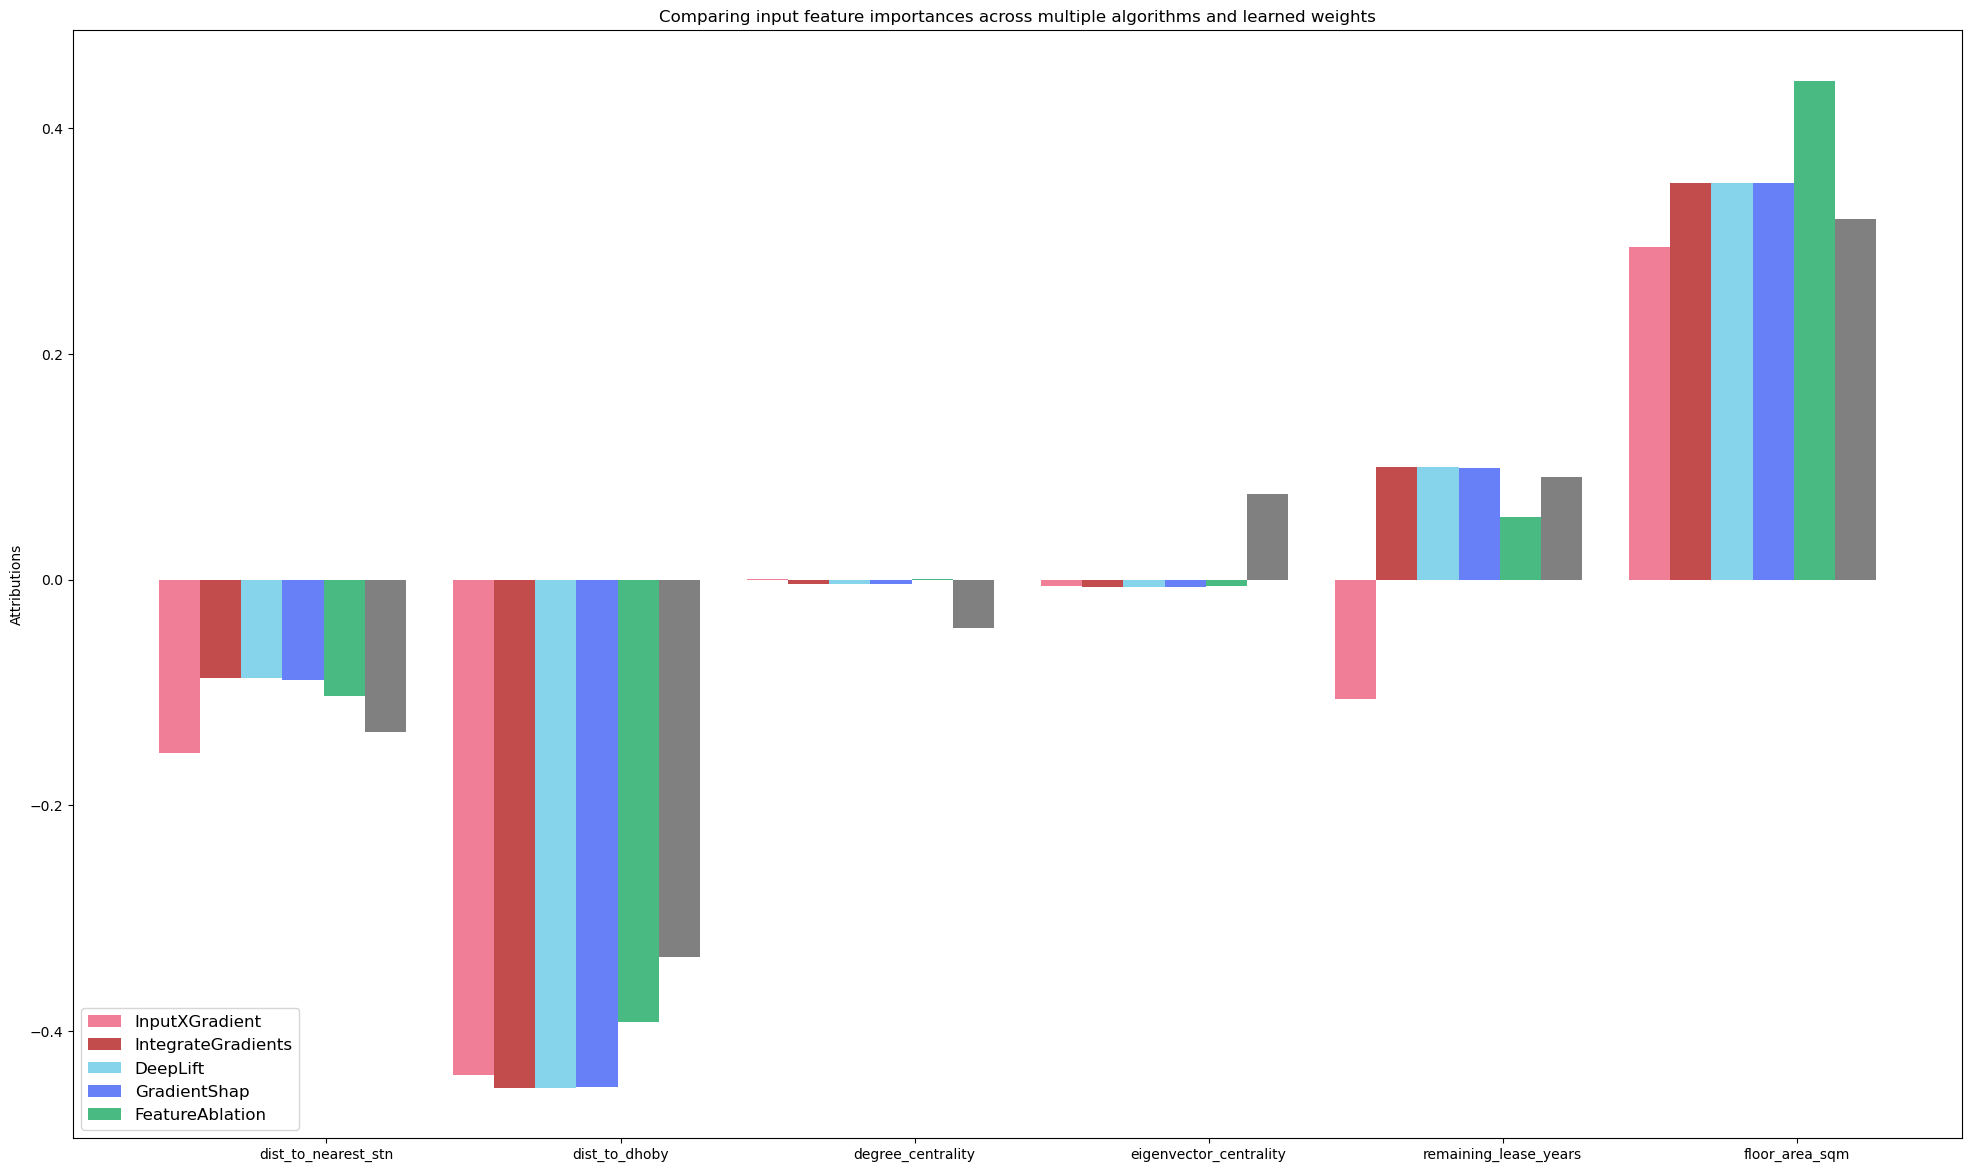

In [60]:
X_test = X_test_tensor[:1000]

baseline = torch.zeros_like(X_test)

ixg = InputXGradient(model)
ig = IntegratedGradients(model)
dl = DeepLift(model)
gs = GradientShap(model)
fa = FeatureAblation(model)

ixg_attr_test = ixg.attribute(X_test)
ig_attr_test = ig.attribute(X_test, baseline)
dl_attr_test = dl.attribute(X_test, baseline)
gs_attr_test = gs.attribute(X_test, baselines=baseline, n_samples=50, stdevs=0.09)
fa_attr_test = fa.attribute(X_test)

feature_names = X_test_scaled_df.columns.tolist()

x_axis_data = np.arange(X_test.shape[1])
x_axis_data_labels = list(map(lambda idx: feature_names[idx], x_axis_data))

ixg_attr_test_sum = ixg_attr_test.detach().numpy().sum(0)
ixg_attr_test_sum = -ixg_attr_test_sum
ixg_attr_test_norm_sum = ixg_attr_test_sum / np.linalg.norm(ixg_attr_test_sum, ord=1)

ig_attr_test_sum = ig_attr_test.detach().numpy().sum(0)
ig_attr_test_sum = -ig_attr_test_sum
ig_attr_test_norm_sum = ig_attr_test_sum / np.linalg.norm(ig_attr_test_sum, ord=1)

dl_attr_test_sum = dl_attr_test.detach().numpy().sum(0)
dl_attr_test_sum = -dl_attr_test_sum
dl_attr_test_norm_sum = dl_attr_test_sum / np.linalg.norm(dl_attr_test_sum, ord=1)

gs_attr_test_sum = gs_attr_test.detach().numpy().sum(0)
gs_attr_test_sum = -gs_attr_test_sum
gs_attr_test_norm_sum = gs_attr_test_sum / np.linalg.norm(gs_attr_test_sum,ord=1)

fa_attr_test_sum = fa_attr_test.detach().numpy().sum(0)
fa_attr_test_sum = -fa_attr_test_sum
fa_attr_test_norm_sum = fa_attr_test_sum / np.linalg.norm(fa_attr_test_sum, ord=1)

lin_weight = model.lin1.weight[0].detach().numpy()
y_axis_lin_weight = lin_weight / np.linalg.norm(lin_weight, ord=1)

width = 0.14
legends = ['InputXGradient', 'IntegrateGradients', 'DeepLift', 'GradientShap', 'FeatureAblation']

plt.figure(figsize=(20, 12))

ax = plt.subplot()
ax.set_title('Comparing input feature importances across multiple algorithms and learned weights')
ax.set_ylabel('Attributions')

FONT_SIZE = 16
plt.rc('font', size=FONT_SIZE) 
plt.rc('axes', titlesize=FONT_SIZE)
plt.rc('axes', labelsize=FONT_SIZE)
plt.rc('legend', fontsize=FONT_SIZE - 4)

ax.bar(x_axis_data, ixg_attr_test_norm_sum, width, align='center', alpha=0.8, color='#eb5e7c')
ax.bar(x_axis_data + width, ig_attr_test_norm_sum, width, align='center', alpha=0.7, color='#A90000')
ax.bar(x_axis_data + 2 * width, dl_attr_test_norm_sum, width, align='center', alpha=0.6, color='#34b8e0')
ax.bar(x_axis_data + 3 * width, gs_attr_test_norm_sum, width, align='center',  alpha=0.8, color='#4260f5')
ax.bar(x_axis_data + 4 * width, fa_attr_test_norm_sum, width, align='center', alpha=1.0, color='#49ba81')
ax.bar(x_axis_data + 5 * width, y_axis_lin_weight, width, align='center', alpha=1.0, color='grey')

ax.autoscale_view()
plt.tight_layout()

ax.set_xticks(x_axis_data + 0.5)
ax.set_xticklabels(x_axis_data_labels)

plt.legend(legends, loc=3)
plt.show()


> Read the following [descriptions](https://captum.ai/docs/attribution_algorithms) and [comparisons](https://captum.ai/docs/algorithms_comparison_matrix) in Captum to build up your understanding of the difference of various explainability algorithms. Based on your plot, identify the three most important features for regression. Explain how each of these features influences the regression outcome.


\# TODO: \<Enter your answer here\>
Looking at the magnitude of the attributions across all methods, we can see that 'floor_area_sqm', 'dist_to_dhoby', and 'remaining_lease_years' stand out with large absolute attributions.

'floor_area_sqm': larger floor area usually correlates with higher resale prices, since bigger flats are usually more expensive. A positive bar indicates that higher floor area leads to a higher predicted price.

'dist_to_dhoby': the distance to dhoby can have a negative relationship with resale price, as the houses further away from a station are often less desirable. A negative bar for this feature suggests that as distance increases, predicted resale price decreases.

'remaining_lease_years': houses with more remaining lease years usually fetch higher resale price, because buyers value the longer tenure. However, in this model, it is negative and it is less common for typical housing data. It might mean the model has learned an inverse relationship.

Part B, Q4 (10 marks)
---

Model degradation is a common issue faced when deploying machine learning models (including neural networks) in the real world. New data points could exhibit a different pattern from older data points due to factors such as changes in government policy or market sentiments. For instance, housing prices in Singapore have been increasing and the Singapore government has introduced 3 rounds of cooling measures over the past years (16 December 2021, 30 September 2022, 27 April 2023).

In such situations, the distribution of the new data points could differ from the original data distribution which the models were trained on. Recall that machine learning models often work with the assumption that the test distribution should be similar to train distribution. When this assumption is violated, model performance will be adversely impacted.  In the last part of this assignment, we will investigate to what extent model degradation has occurred.




---



In [65]:
!pip install alibi-detect

/opt/anaconda3/lib/python3.12/pty.py:95: DeprecationWarning: This process (pid=34546) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 7.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 5.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0
  Attempting uninstall: numba
    Found existing installation: numba 0.60.0
    Uninstalling numba-0.60.0:
      Successfully uninstalled numba-0.60.0


In [13]:
from alibi_detect.cd import TabularDrift

> Evaluate your model from B1 on data from year 2022 and report the test R2.

In [19]:
# TODO: Enter your code here

df = pd.read_csv('hdb_price_prediction.csv')


train_df = df[df['year'] <= 2020].copy()
test_df = df[df['year'] == 2021].copy()

train_df.drop(columns=['year','full_address','nearest_stn'], inplace=True)
test_df.drop(columns=['year','full_address','nearest_stn'], inplace=True)

print('Train set size:', len(train_df))
print('Test set size:', len(test_df))

FileNotFoundError: [Errno 2] No such file or directory: 'hdb_price_prediction.csv'

In [11]:
numeric_cols = ['dist_to_nearest_stn','dist_to_dhoby','degree_centrality','eigenvector_centrality',
                 'remaining_lease_years','floor_area_sqm']
categorical_cols = ['month','town','flat_model_type','storey_range']

data_config = DataConfig(
    target=["resale_price"],  
    continuous_cols=numeric_cols,
    categorical_cols=categorical_cols,
)
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50,
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50",  
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

tabular_model.fit(train_df, 
                  optimizer=QHAdam)

NameError: name 'DataConfig' is not defined

In [9]:
evaluation = tabular_model.evaluate(test_df)
predicted = tabular_model.predict(test_df)


NameError: name 'tabular_model' is not defined

In [97]:
y_true = test_df['resale_price']
y_pred = predicted['resale_price_prediction']

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f'Test RMSE: {rmse:.3f}')
print(f'Test R2: {r2:.3f}')

Test RMSE: 70836.522
Test R2: 0.810


> Evaluate your model from B1 on data from year 2023 and report the test R2.

In [7]:
# TODO: Enter your code here

test_df_2 = df[df['year'] == 2023].copy()

test_df_2.drop(columns=['year','full_address','nearest_stn'], inplace=True)

print('Train set size (2020):', len(train_df))
print('Test set size (2023):', len(test_df_2))

NameError: name 'df' is not defined

In [ ]:
evaluation_2 = tabular_model.evaluate(df_test_2)
predicted_2 = tabular_model.predict(df_test_2)

In [ ]:
y_true_2 = test_df['resale_price']
y_pred_2 = predicted_2['resale_price_prediction']

mse_2 = mean_squared_error(y_true_2, y_pred_2)
rmse_2 = np.sqrt(mse_2)
r2_2 = r2_score(y_true_2, y_pred_2)

print(f'Test RMSE: {rmse_2:.3f}')
print(f'Test R2: {r2_2:.3f}')

> Did model degradation occur for the deep learning model?

\# TODO: \<Enter your answer here\>
Yes, model degradation occurred for the deep learning model, the R^2 value of the model in B1 (2021) is 0.801, but it dropped to ### for 2022 and ### for 2023.

Model degradation could be caused by [various data distribution shifts](https://huyenchip.com/2022/02/07/data-distribution-shifts-and-monitoring.html#data-shift-types): covariate shift (features), label shift and/or concept drift (altered relationship between features and labels).
There are various conflicting terminologies in the [literature](https://www.sciencedirect.com/science/article/pii/S0950705122002854#tbl1). Let’s stick to this reference for this assignment.

> Using the **Alibi Detect** library, apply the **TabularDrift** function with the training data (year 2020 and before) used as the reference and **detect which features have drifted** in the 2023 test dataset. Before running the statistical tests, ensure you **sample 1000 data points** each from the train and test data. Do not use the whole train/test data. (Hint: use this example as a guide https://docs.seldon.io/projects/alibi-detect/en/stable/examples/cd_chi2ks_adult.html)


In [ ]:
# TODO: Enter your code here

train_copy = df_train.copy()
train_copy.drop(columns=['resale_price','month'],inplace=True)

test_copy = df_test.copy()
test_copy.drop(columns=['resale_price','month'],inplace=True)

feature_names = train_copy.columns

sample_train = train_copy.sample(1000, random_state = 42)
sample_test = test_copy.sample(1000, random_state = 42)

categories_per_feature = {f: None for f in range(sample_train.values.shape[1])}
cd = TabularDrift(sample_train.values, 
                  p_val=.05, 
                  categories_per_feature=categories_per_feature)
preds = cd.predict(sample_test.values)
labels = ['No!', 'Yes!']
print('Drift? {}'.format(labels[preds['data']['is_drift']]))

In [ ]:
fpreds = cd.predict(sample_test.values, drift_type='feature')
for f in range(cd.n_features):
    stat = 'Chi2' if f in list(categories_per_feature.keys()) else 'K-S'
    fname = feature_names[f]
    is_drift = fpreds['data']['is_drift'][f]
    stat_val, p_val = fpreds['data']['distance'][f], fpreds['data']['p_val'][f]
    print(f'{fname} -- Drift? {labels[is_drift]} -- {stat} {stat_val:.3f} -- p-value {p_val:.3f}')
    

> Assuming that the flurry of housing measures have made an impact on the relationship between all the features and resale_price (i.e. P(Y|X) changes), which type of data distribution shift possibly led to model degradation?

\# TODO: \<Enter your answer here\>
If the relationship between the features (X) and the target (Y) has changed, it would be a concept drift. This means that the way the features (like location, area, etc.) relate to the resale price has changed over time. Even if the input data looks similar, the rules or patterns that link these inputs to the price have shifted. 

> From your analysis via TabularDrift, which features contribute to this shift?

\# TODO: \<Enter your answer here\>
In the analysis, a p-value under 0.05 indicates that we can reject the null hypothesis - that there is no change in the feature's distribution. This means there is strong statistical evidence of drift in the feature. The features 'town', 'nearest_stn', 'eigenvector_centrality', 'flat_model_type', 'remaining_lease_years', and 'floor_area_sqm' have significantly shifted.

> Suggest 1 way to address model degradation and implement it, showing improved test R2 for year 2023.

\# TODO: \<Enter your answer here\>
My suggestion is that we can retrain the model by adding 2023 data to the training set. This model updating allows the model to adapt to the new relationship between festures and resale_price, and we can evaluate the retrained model on 2023 data to see an improved R^2.

In [ ]:
# TODO: Enter your code here

train_df_old = df[df['year'] <= 2020].copy()
new_df = df[df['year'] == 2023].copy

cols_to_drop = ['year', 'full_address', 'nearest_stn']
train_df_old.drop(columns=cols_to_drop, inplace=True)
new_df.drop(columns=cols_to_drop, inplace=True)

retrain_df = pd.concat([train_df_old, new_df])
print('Retraining set size:', len(retrain_df))

test_2023_df = new_df.copy()

numeric_cols = ['dist_to_neatest_stn',
                'dis_to_dhoby',
                'degree_centrality',
                'eigenvector_centrality',
                'remaining_lease_years',
                'floor_area_sqm']
categorical_cols = ['month', 'town', 'flat_model_type', 'storey_range']

data_config = DataConfig(
    target=["resale_price"],
    continuous_cols=numeric_cols,
    categorical_cols=categorical_cols
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50
)

optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50"
)

updated_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)

updated_model.fit(df_retrain)

evaluation_updated = updated_model.evaluate(df_test_2023)
predicted_updated = updated_model.predict(df_test_2023)

y_true_updated = test_2023_df['resale_price'].values
y_pred_updated = predicted_updated['resale_price_prediction'].values

r2_updated = r2_score(y_true_updated, y_pred_updated)
print(f"Improved Test R2 on 2023 data: {r2_updated:.3f}")

This is an improved R^2 scaore for 2023 showing an increase from ### to ### as we retrain the model by updating the training dataset.